<a href="https://colab.research.google.com/github/spanish-inquisition-optimization/GradientDescent/blob/master/Lection%20examples/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [75]:
# %run gradient_descent.ipynb import gradient_descent
from core.gradient_descent import *

[[-20.          20.        ]
 [  5.21598581  17.37753748]
 [  4.18043169   7.42641923]
 [  5.00709278   7.34039732]
 [  4.97308933   7.01401798]
 [  5.00023329   7.01119008]
 [  4.99911491   7.00046129]
 [  5.00000769   7.00036823]
 [  4.99997084   7.00001521]
 [  5.00000025   7.00001215]
 [  4.99999904   7.0000005 ]
 [  5.00000001   7.0000004 ]
 [  4.99999997   7.00000002]
 [  5.           7.00000001]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]]


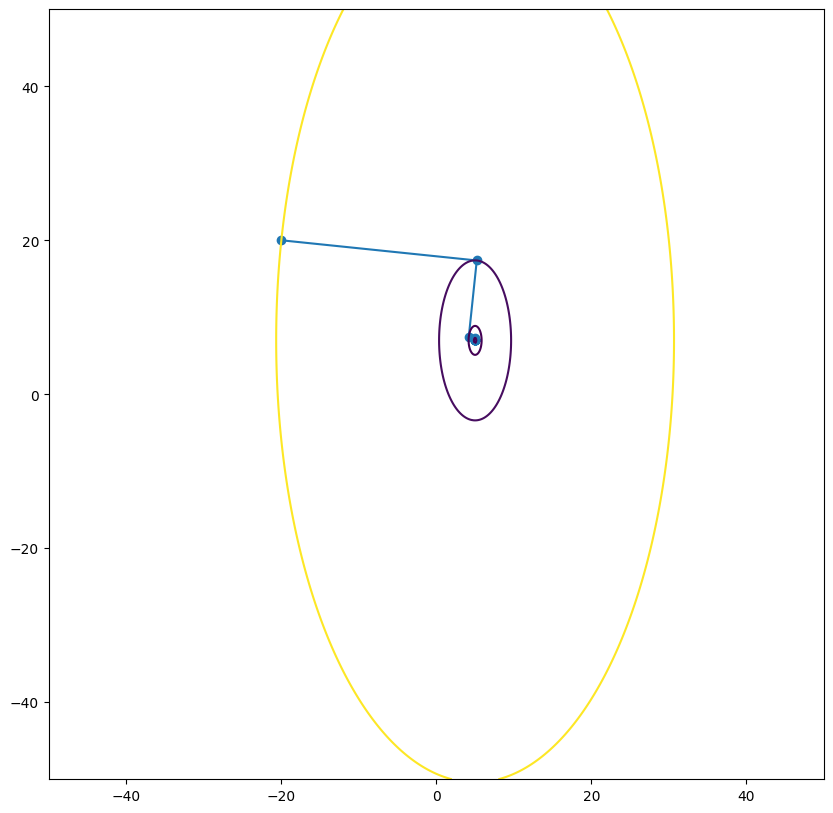

In [76]:
plt.rcParams["figure.figsize"] = (10,10)
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)

alpha = 5
def f(x):
    return alpha * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def grad(x):
    return [2 * alpha * (x[0]  - 5), 2 * (x[1] - 7)]

points = np.array(gradient_descent(f, grad, [-20, 20], fibonacci_search(30), lambda f, points: len(points) > 20))
print(points)

plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted(set([f(p) for p in points])))

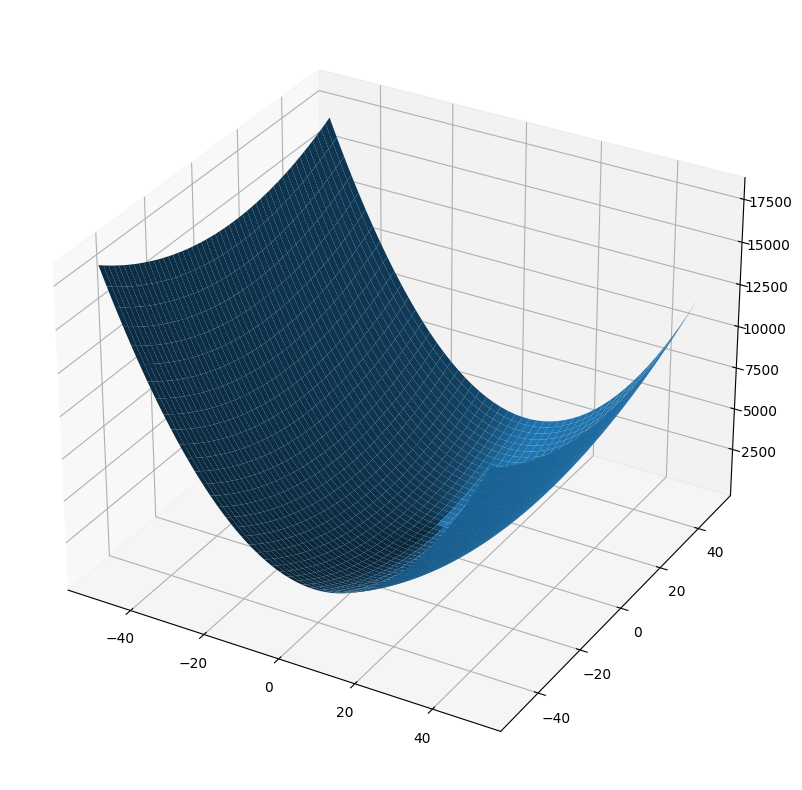

In [77]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f([X, Y]))


# Gradient descent $f(x, y) = \sin(0.5 x^2 - 0.25 y^2 + 3)cos(2x+1-\exp(y))$

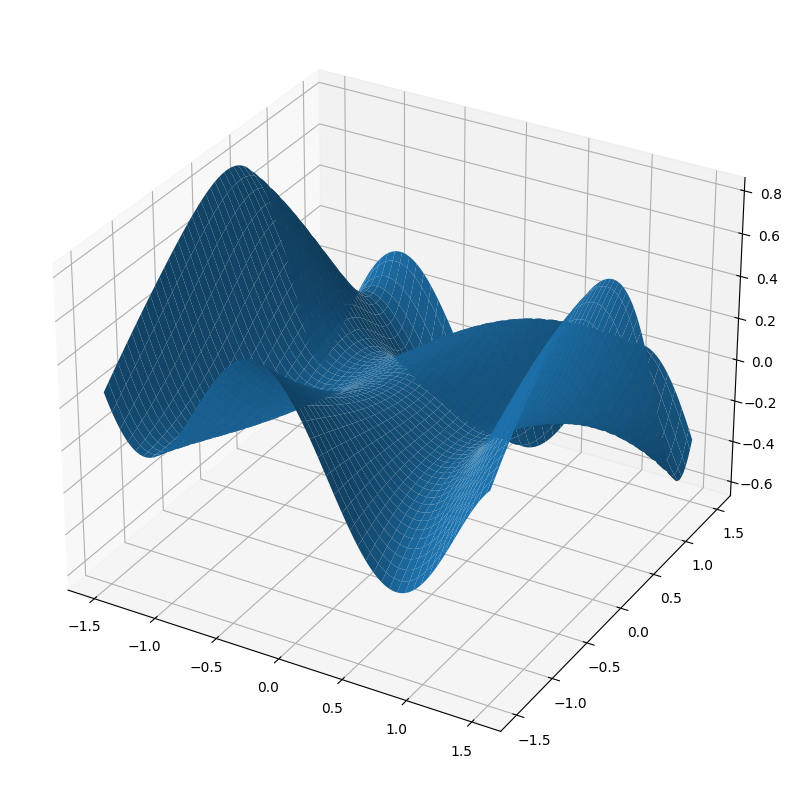

In [78]:
def trig_f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

def trig_grad(x):
    h = 1e-5
    return (trig_f(x[:, np.newaxis] + h * np.eye(2)) - trig_f(x[:, np.newaxis] - h * np.eye(2)))/(2 * h)

t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, trig_f(np.stack((X, Y))))

[[-0.1        -0.4       ]
 [-0.0998167  -0.4006323 ]
 [-0.0996351  -0.40126553]
 [-0.09945517 -0.40189973]
 [-0.09927691 -0.40253491]
 [-0.09910031 -0.4031711 ]
 [-0.09892535 -0.40380832]
 [-0.09875202 -0.40444658]
 [-0.09858032 -0.40508592]
 [-0.09841023 -0.40572635]
 [-0.09824175 -0.4063679 ]
 [-0.09807486 -0.40701058]
 [-0.09790955 -0.40765442]
 [-0.09774582 -0.40829944]
 [-0.09758365 -0.40894566]
 [-0.09742304 -0.4095931 ]
 [-0.09726398 -0.41024179]
 [-0.09710646 -0.41089175]
 [-0.09695047 -0.41154299]
 [-0.096796   -0.41219554]
 [-0.09664306 -0.41284943]
 [-0.09649162 -0.41350467]
 [-0.09634168 -0.41416128]
 [-0.09619323 -0.41481929]
 [-0.09604627 -0.41547872]
 [-0.09590079 -0.41613959]
 [-0.09575679 -0.41680193]
 [-0.09561425 -0.41746575]
 [-0.09547318 -0.41813107]
 [-0.09533356 -0.41879793]
 [-0.09519538 -0.41946633]]
[-0.09519538 -0.41946633] 0.1779802411077733


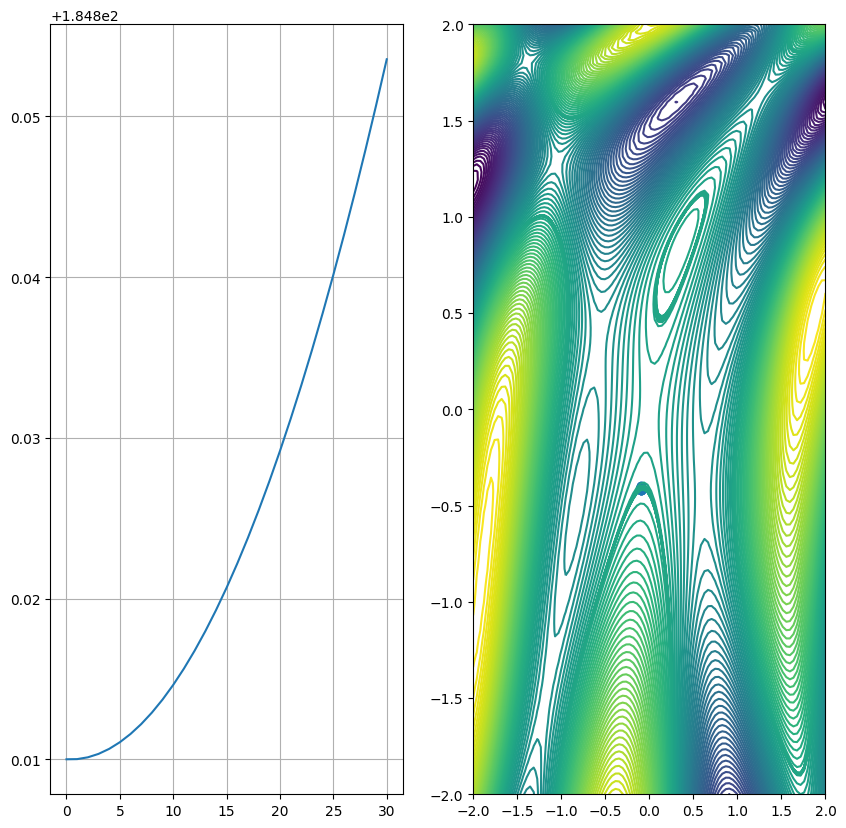

In [84]:
lr = 0.1
epoch = 30
x = np.array([-0.1, -0.4])


points = np.array(gradient_descent(trig_f, trig_grad, x, fixed_step_search(lr), lambda f, points: len(points) > 30))
print(points)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points.T))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, trig_f(np.stack((X, Y))), levels=np.sort(np.concatenate((trig_f(points.T), np.linspace(-1, 1, 100)))))
print(points[-1], trig_f(points[-1]))

# Gradient descent for Rosenbrock function $f(x,y) = 100(y - x^2)^2 + (1 - x)^2$

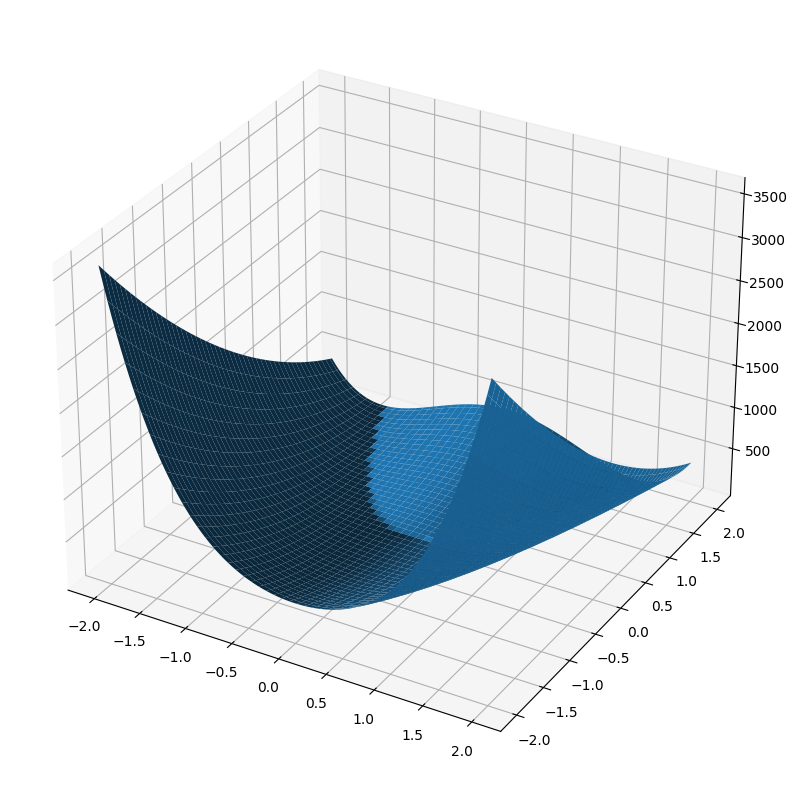

In [80]:
from scipy.optimize import rosen, rosen_der

x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen(np.stack((X, Y))))
plt.show()

[[ 5.00000000e-01 -5.00000000e-01]
 [ 1.99818470e+04 -2.01159500e+04]
 [ 9.75186166e+43 -2.44018024e+39]
 [            inf            -inf]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]
 [            nan   

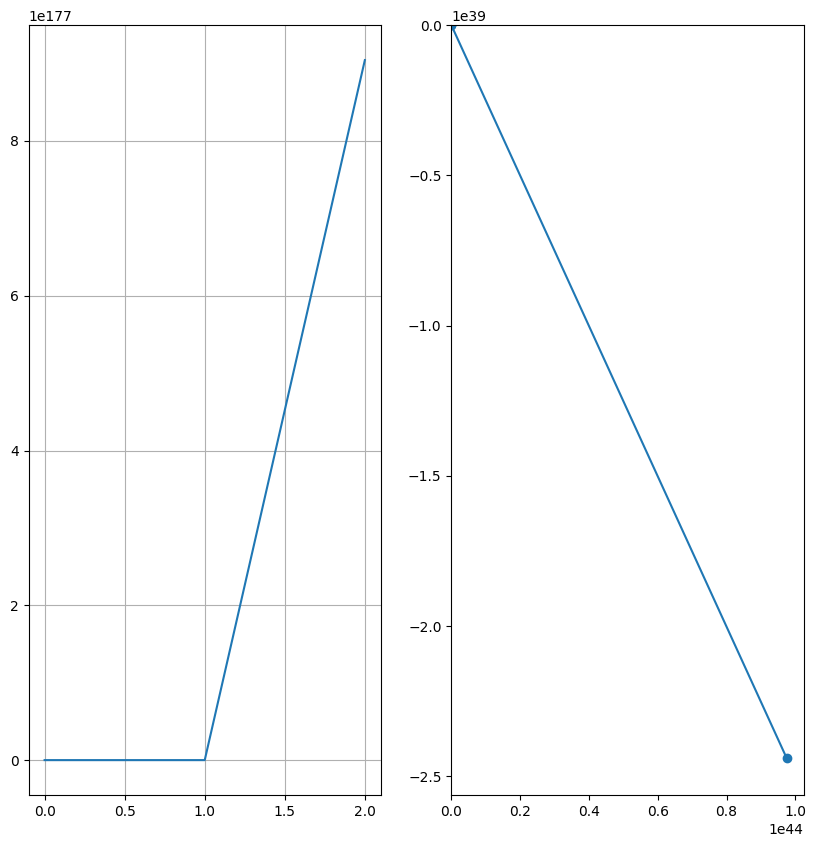

In [81]:
lr = 0.003
epoch = 100
x = np.array([0.5, -0.5])

points = np.array(gradient_descent(rosen, rosen_der, x, fixed_step_search(lr), lambda f, points: len(points) > epoch))
print(points)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(rosen(points.T))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, rosen(np.stack((X, Y))), levels=np.sort(np.concatenate((rosen(points.T), np.linspace(-100, 200, 30)))))
print(points[-1], rosen(points[-1]))